<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/EfficientNet_Rethinking_Model_Scaling_for_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks**

논문 링크: https://arxiv.org/abs/1905.11946

해당 논문은 나올 당시 별로 지나지도 않았는데 매우 압도적인 성능때문에 금세 유명해졌다.

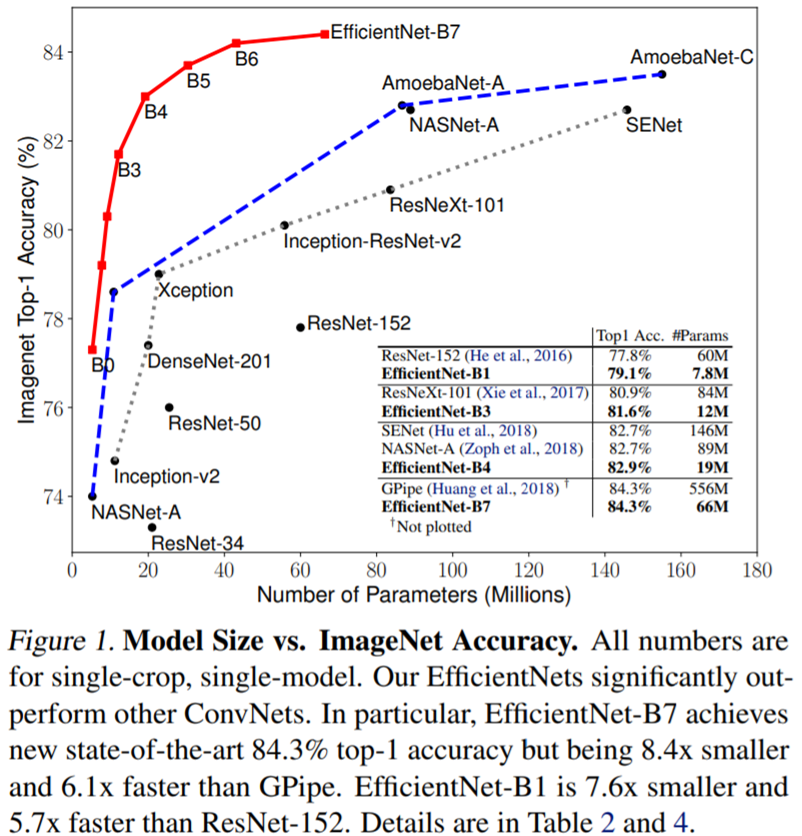

먼저 위의 그림 Figure 1의 결과를 보면 매우 압도적인 성능을 자랑하는 것을 확인할 수 있다. 이제 어떻게 이 모델이 다른 모델들의 성능을 크게 상회하는 성능을 낼 수 있었는지 살펴보겠다.

## **EfficientNet 구조**

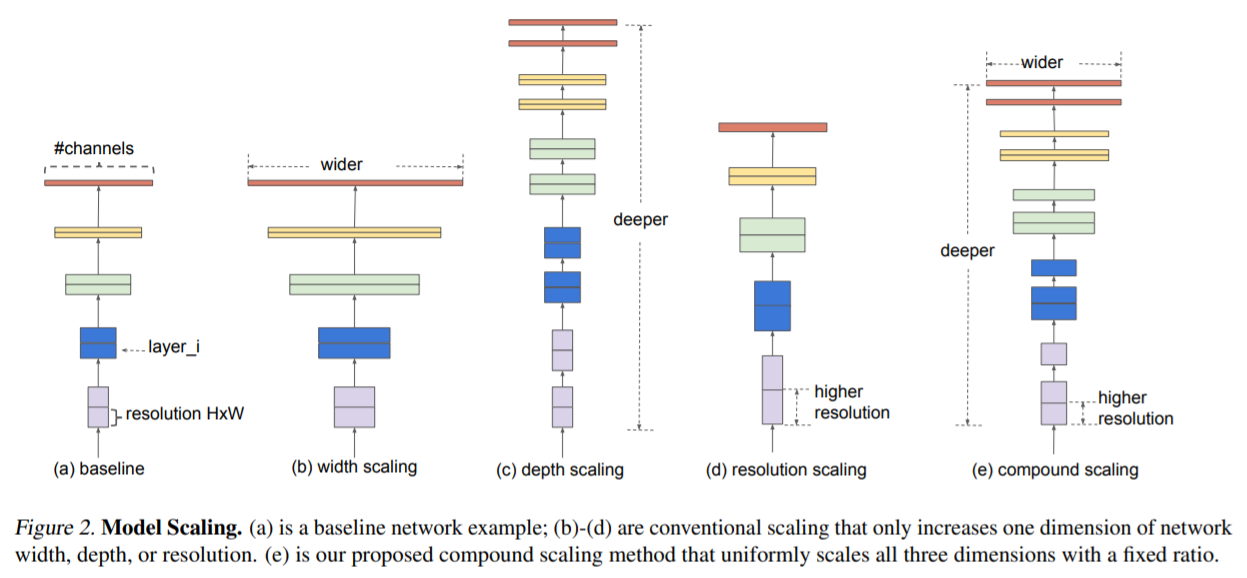

위의 그림 Figure 2는 Model Scaling의 예시이다. 대표적으로 **filter의 개수(channel의 개수를) 늘리는 width scaling**과 **layer의 개수를 늘리는 depth scaling**과 **input image의 해상도를 높이는 resolution scaling**이 자주 사용된다.

- width scaling (EX. MobileNet, ShuffleNet)
- depth scaling (EX. ResNet)

하지만 기존 방식에서는 위의 3가지 scaling을 동시에 고려하는 경우가 거의 없었다. 뿐만아니라 3가지 scaling 기법 중에 어떤 기법을 사용할지에 대한 가이드라인도 존재하지 않고, 무작정 키운다고 하여 정확도가 오르는 것이 아니기에 여러 경우의 수를 직접 실험해봐야하는 어려움도 존재했다. 따라서 본 논문은 **3가지 scaling 기법에 대해 각 scaling 기법마다 나머지는 고정해두고 1개의 scaling factor만 키워가며 정확도의 변화를 측정**했다.

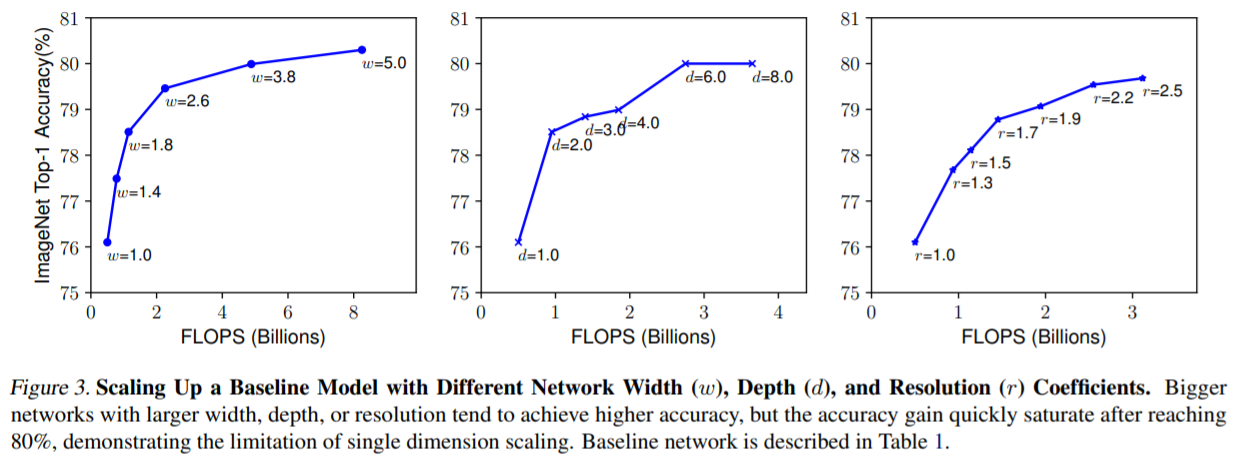

위의 그림 Figure 3을 보면 알 수 있듯이 **width scaling**, **depth scaling**은 비교적 이른 시점에 정확도가 포화 상태(saturation)가 되며, 그나마 **resolution scaling**이 증가하면 증가할수록 정확도 또한 잘 증가하는 것을 확인할 수 있다.

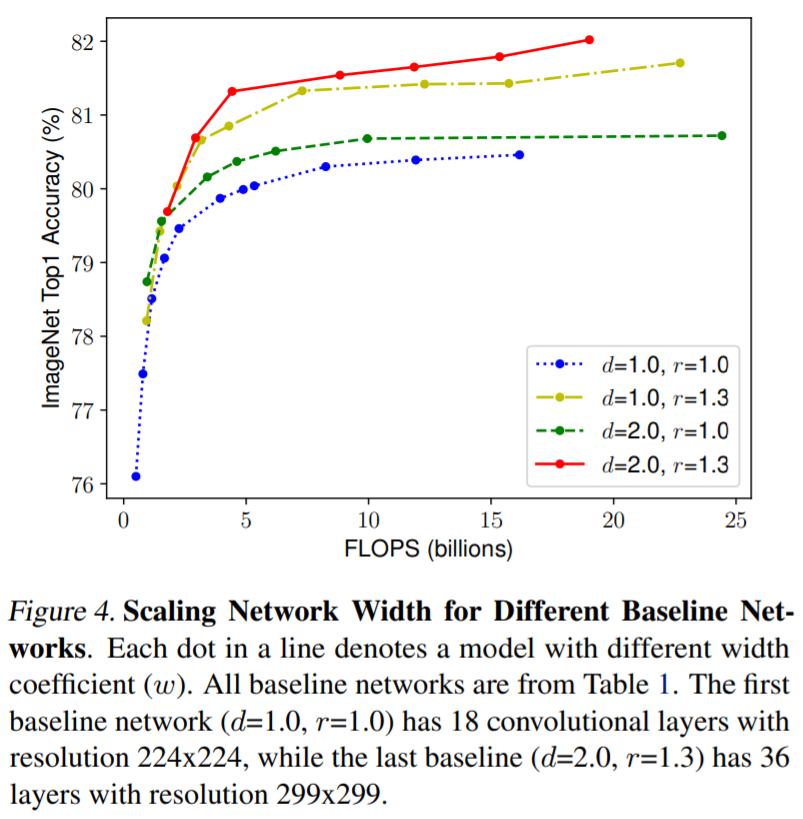

비슷한 방식으로 위의 그림 Figure 4에서는 **depth(d)와 resolution(r)을 고정해두고 width만 조절**하여 정확도의 변화를 측정했다. 같은 FLOPS에도 불구하고 크게는 **1.5%**까지 정확도가 차이날 수 있다.

초록색 선과 노란색 선을 비교하면 depth를 키우는 것 보다는 resolution을 키우는 것이 정확도가 좋음을 알 수 있고, 빨간색 선을 보면 1가지, 혹은 2가지 scaling factor만 키워주는 것 보다 3가지 scaling factor를 동시에 키워주는 것이 가장 성능이 좋음을 실험적으로 보여주고 있습니다.

정리해보면, Input image가 커지면 그에 따라 receptive field 또한 늘려줘야 하며, 더 커진 fine-grained pattern들을 학습하기 위해 더 많은 channel이 필요하다. 즉, 모델의 크기를 키울때 위의 3가지 scaling을 동시에 고려해야한다. 그러면 어떻게 이 3가지 요소들을 고려할까?

우선 해당 논문은 모델(F)를 고정하고 depth(d), width(w), resolution(r) 3가지를 조절하는 방법을 제안한다. 이때 고정하는 모델(F)를 좋은 모델로 선정하는 것이 매우 중요한데, 아무리 scaling factor를 조절한다해도 초기 모델의 성능이 안좋으면 임계 성능도 낮기 때문이다. 해당 논문은 **MnasNet**과 거의 동일한 search space 하에서 AutoML을  통해 모델을 탐색하였고, 이를 통해 찾은 작은 모델을 **EfficientNet-B0**이라 부른다.

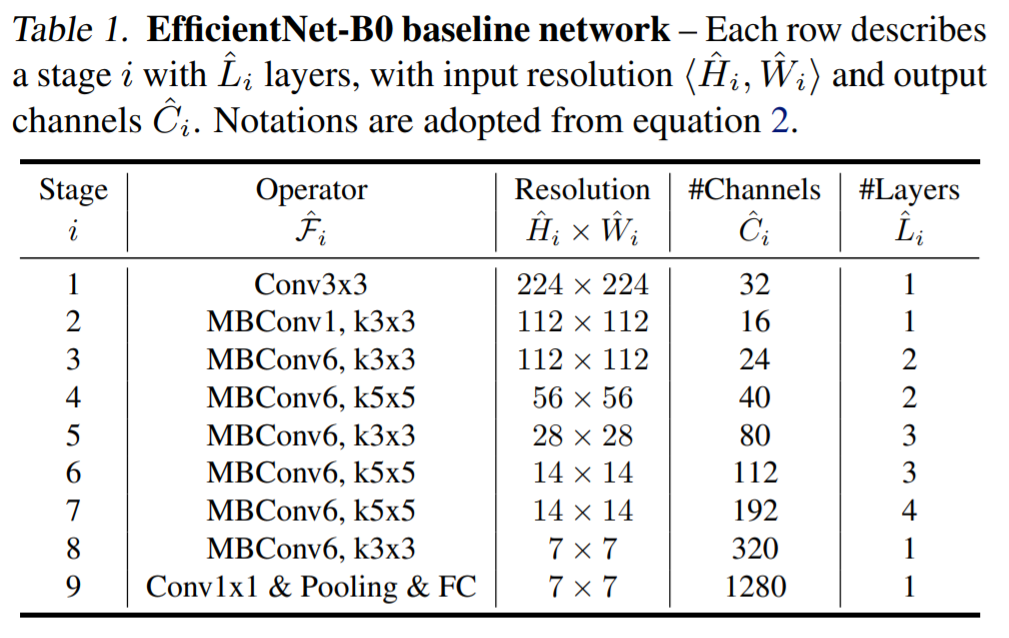

위의 표 Table 1에서는 모델의 구성에 대해 보여준다. MnasNet과 거의 유사한 것을 확인할 수 있다.

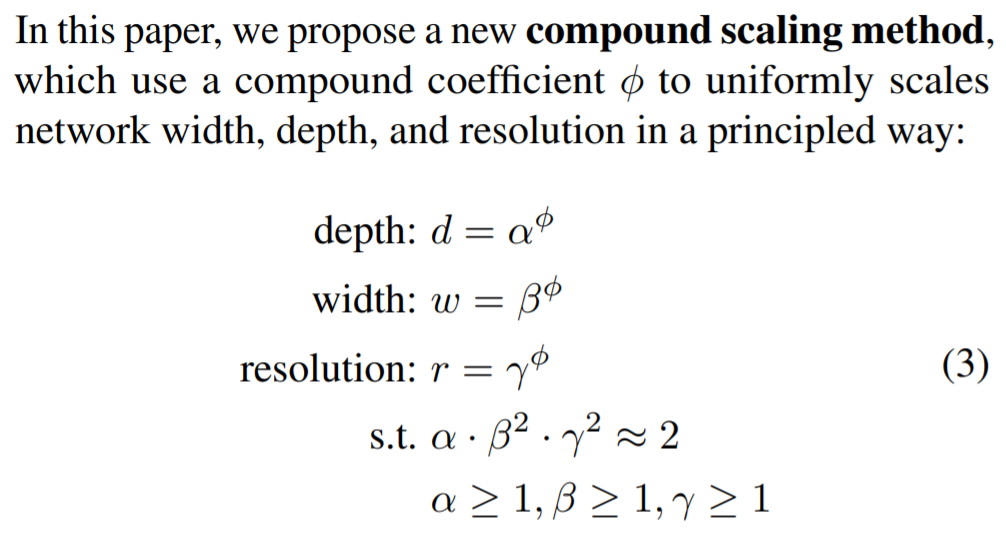

이제 Table 1에 나온 모델을 기점으로 3가지 scaling factor를 동시에 고려하는 **Compund Scaling**을 적용하여 실험을 했다. 위의 식을 보면, depth, width, resolution은 각각 α, β, γ로 표현하며 위의 조건을 만족해야한다. width와 resolution에 제곱이 들어간 이유는 depth는 2배로 키워주면 FLOPS도 2배로 증가하지만, width와 resolution은 가로와 세로가 각각 곱해지기 때문에 제곱 배 증가한다.

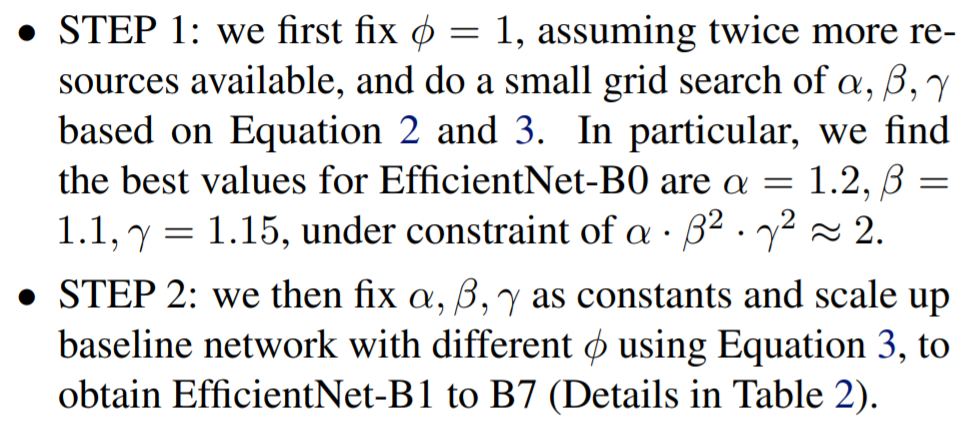

그 뒤 전체 모델의 사이즈는 α, β, γ에 똑같은  φ만큼 제곱하여 조절하게 된다. EfficientNet의 α, β, γ은 간단한 grid search를 통해 구하는 방식을 제안한다. 위의 이미지와 같이 STEP 1에서는 φ를 1로 고정한 뒤, target dataset에 좋은 성능을 보이는 α, β, γ를 찾아낸다. 본 논문은 α, β, γ를 각각 1.2, 1.1, 1.15를 사용했으며, 방금 구한 3개의 scaling factor는 고정한 뒤 φ를 키워주며 모델의 사이즈를 키운다.

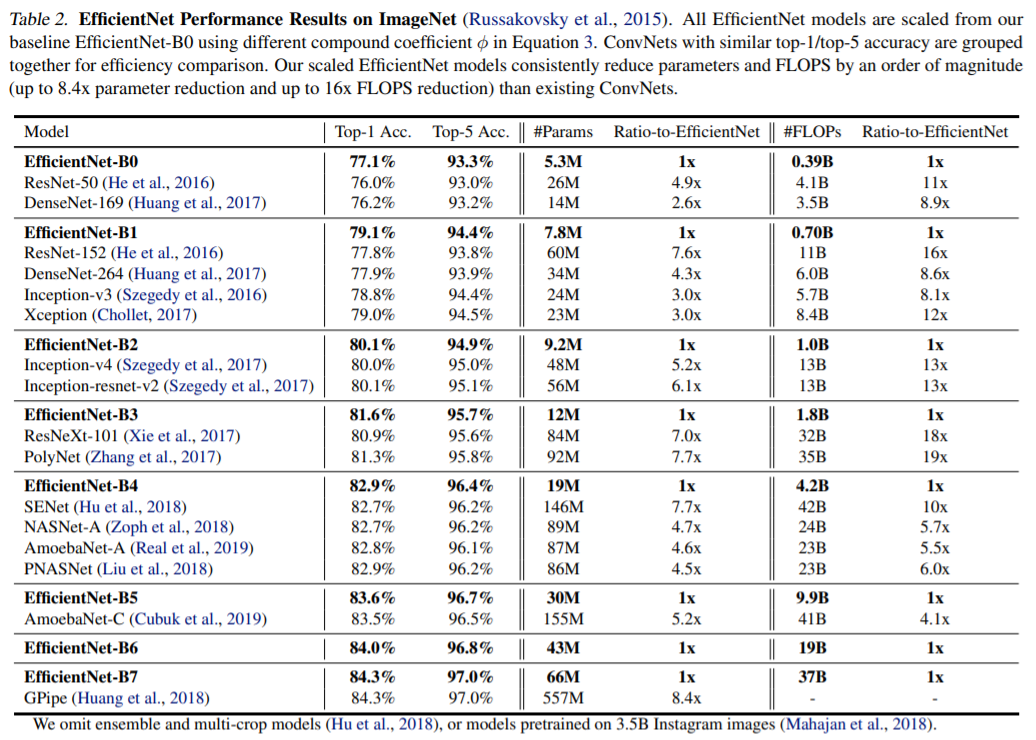

위의 표 Table 2를 보면 알 수 있듯이 ConvNet들에 비해 비슷한 정확도를 보이면서도 **parameter 수와 FLOPS 수를 매우 많이 절약**할 수 있다. 또한 기존에 ImageNet dataset에서 가장 높은 정확도를 달성한 GPipe보다 더 높은 정확도를 달성했다.

나머지 Table과 Figure의 결과 역시 parameter 수와 FLOPS 수를 절약하면서 동시에 높은 정확도와 빠른 학습 속도를 보여준다.

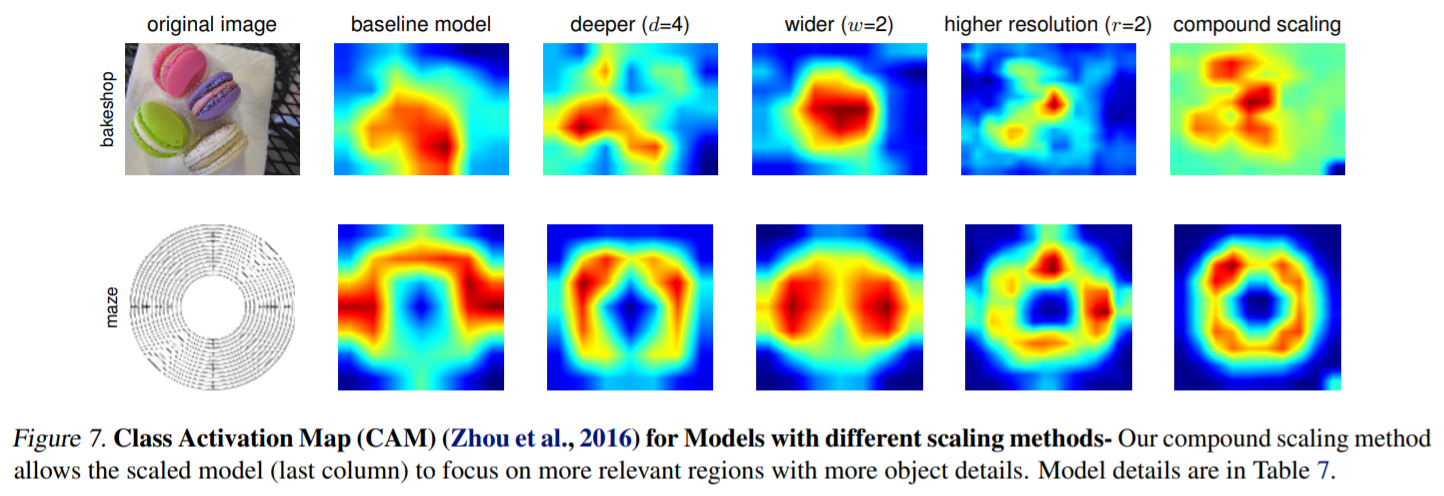

마지막으로 위의 그림 Figure 7에서는 모델이 이미지를 분류할 때 이미지의 어느 영역에 집중했는지 확인할 수 있는 **Class Activation Map(CAM)**을 뽑아낸 것이다. 3개의 scaling factor를 각각 고려할 때 보다 동시에 고려하였을 때 더 정교한 CAM을 얻을 수 있다는 결과를 도출해냈다.